# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [3]:
# 1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**
import numpy as np
affitti = np.array([720, 980, 650, 1200])
# 2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.
spesa_totale = np.sum(affitti)
# 3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
#     - Modifica il vettore per applicare l’aumento.
#     - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.
where_1200 = np.where(affitti == 1200)
affitti[where_1200] = affitti[where_1200] * 1.12

if(1344 in affitti):
    print("L'importo aggiornato è esattamente 1344,00 €")
    spesa_totale_1200 = np.sum(affitti)
    
# 4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
#     - Applica la modifica.

where_650 = np.where(affitti == 650)
affitti[where_650] = affitti[where_650] * 0.9

# 5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
#     - Aggiorna il vettore di conseguenza.

where_720 = np.where(affitti == 720)
affitti[where_720] = affitti[where_720] * 1.05

where_980 = np.where(affitti == 980)
affitti[where_980] = affitti[where_980] * 1.05


# 7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

nuova_spesa_totale = np.sum(affitti)


# 8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

#     (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)

aumento_affitto = spesa_totale_1200 - spesa_totale
print(f"L'aumento dell'affitto più alto ha influito sulla spesa complessiva di: {aumento_affitto} €")


L'importo aggiornato è esattamente 1344,00 €
L'aumento dell'affitto più alto ha influito sulla spesa complessiva di: 144 €


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

In [ ]:
# Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
# a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

import numpy as np

def random_walk(steps):
    step_choices = np.random.choice([-1, 1], size=steps)
    position = np.insert(np.cumsum(step_choices), 0, 0) 
    return position

# Esempio d’uso
position = random_walk(1000)
print(position)


[ 0 -1 -2 ... 20 19 18]


In [13]:
# 1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. 
# Il primo rappresenta la media della posizione ad ogni passo degli N camminatori 
# ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

def random_walk_multiple(n, N):
    walks = np.array([random_walk(n) for _ in range(N)])
    
    mean_positions = np.mean(walks, axis=0)
    std_positions = np.std(walks, axis=0)
    
    return mean_positions, std_positions



mean, std = random_walk_multiple(50, 10)
print("Media della posizione ad ogni passo:", mean)
print("Deviazione standard della posizione ad ogni passo:", std)

    

Media della posizione ad ogni passo: [ 0.   0.4  1.   1.2  1.2  0.8  0.8  0.2  0.  -0.2 -0.6 -0.2 -0.4 -0.2
 -0.4 -0.8 -0.8 -0.6 -0.2 -0.2  0.2  0.4  0.6  0.4  0.2  0.4  0.8  1.
  1.   1.2  1.   0.4  0.4  0.4  0.2  0.4 -0.2 -0.2 -0.2 -0.8 -0.6 -0.8
 -1.  -1.2 -1.2 -0.8 -1.4 -1.2 -1.2 -1.4 -1.6]
Deviazione standard della posizione ad ogni passo: [0.         0.91651514 1.         1.4        1.32664992 1.66132477
 1.32664992 1.32664992 1.54919334 2.4        2.97321375 3.48711915
 3.2        3.24961536 3.32264955 4.04474968 3.81575681 3.77359245
 4.23792402 3.81575681 3.51567917 3.8        3.8        4.2
 4.04474968 3.8        3.91918359 4.         4.02492236 3.94461658
 4.49444101 4.47660586 4.36348485 4.00499688 3.94461658 4.10365691
 4.14246304 4.57820926 5.17300686 5.09509568 5.66038868 5.75847202
 5.15751878 5.32541078 5.38144962 4.77074418 5.06359556 5.2497619
 4.57820926 4.2708313  4.54312668]


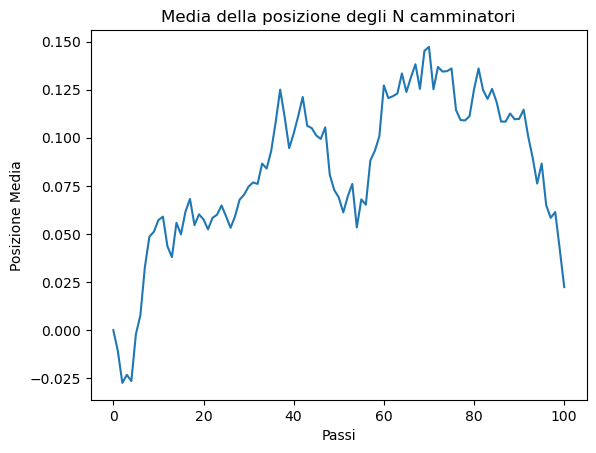

In [42]:
# 2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

import matplotlib.pyplot as plt

random_walks = random_walk_multiple(100, 10000)
# print(random_walks)
plt.plot(random_walks[0])
plt.title("Media della posizione degli N camminatori")
plt.xlabel("Passi")
plt.ylabel("Posizione Media")
plt.show()

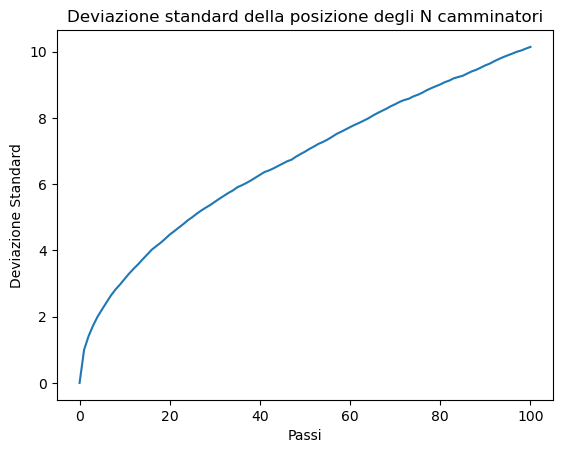

In [ ]:
# 3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione?
# Che andamento ha la deviazione standard rispeto l tempo/passi?
plt.plot(random_walks[1])
plt.title("Deviazione standard della posizione degli N camminatori")
plt.xlabel("Passi")
plt.ylabel("Deviazione Standard")
plt.show()

# la deviazione standard aumenta all'aumentare del campione, ha un andamento crescente rispetto al tempo/passi

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [ ]:
np.random.seed(42)
a = np.random.normal(0, 1, size=(5, 9))  
# print(a)

value = 0.1
closest_indices = np.zeros(a.shape[0], dtype=int)

for i in range(a.shape[0]):
    distances = np.abs(a[i, :] - value)
    closest_indices[i] = np.argmin(distances)
        
print("\nIndices of values closest to 0.1:")
print(closest_indices)

print("\nValues closest to 0.1:")
for i in range(a.shape[0]):
    closest_idx = closest_indices[i]
    print(f"Row {i}: {a[i, closest_idx]}")



Indices of values closest to 0.1:
[1 3 7 5 5]

Values closest to 0.1:
Row 0: -0.13826430117118466
Row 1: 0.24196227156603412
Row 2: 0.11092258970986608
Row 3: -0.013497224737933921
Row 4: 0.1713682811899705


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [60]:
# Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

# 1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
passengers = df[['PassengerId', 'Name', 'Fare']]
print(passengers.head(10).sort_values(by='Fare', ascending=False))


   PassengerId                                               Name     Fare
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  71.2833
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  53.1000
6            7                            McCarthy, Mr. Timothy J  51.8625
9           10                Nasser, Mrs. Nicholas (Adele Achem)  30.0708
7            8                     Palsson, Master. Gosta Leonard  21.0750
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  11.1333
5            6                                   Moran, Mr. James   8.4583
4            5                           Allen, Mr. William Henry   8.0500
2            3                             Heikkinen, Miss. Laina   7.9250
0            1                            Braund, Mr. Owen Harris   7.2500


In [61]:
# 2. **Calcola la media** di:
#    - `Age` (età)
#    - `Fare` (tariffa)
#    - `SibSp` (numero di fratelli/coniugi a bordo)
print("\nMedia dell'età:", df['Age'].mean())
print("Media della tariffa:", df['Fare'].mean())
print("Media del numero di fratelli/coniugi a bordo:", df['SibSp'].mean())


Media dell'età: 29.69911764705882
Media della tariffa: 32.204207968574636
Media del numero di fratelli/coniugi a bordo: 0.5230078563411896


In [ ]:
# 3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

#    $$
#    \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
#    $$

#    *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*
df['Family_index'] = (df['SibSp'] + df['Parch']) / df['Fare'].replace(0, np.nan)
print("\nNuova colonna Family_index:")
print(df['Family_index'].head(10))



Nuova colonna Family_index:
0      0.137931
1      0.014029
2      0.000000
3      0.018832
4      0.000000
         ...   
886    0.000000
887    0.000000
888    0.127932
889    0.000000
890    0.000000
Name: Family_index, Length: 891, dtype: float64


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.
